In [ ]:
# Install required libraries
!pip install pymupdf pytesseract pdf2image
!apt install tesseract-ocr poppler-utils
!pip install pymupdf
!pip install pdfplumber


In [3]:
# ✅ Imports
import fitz  # PyMuPDF
import pytesseract
from pdf2image import convert_from_path
from google.colab import files
from IPython.display import display
from PIL import Image
import io



In [4]:
# ✅ Step 1: Upload PDF
uploaded = files.upload()
pdf_filename = next(iter(uploaded))



Saving sample(background).pdf to sample(background).pdf



📦 Extracting Images from PDF...

Total XREF entries: 31

🖼️ Image at XREF 26 (size: 160x180)


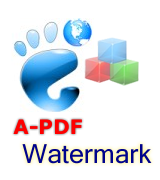

In [5]:
# ✅ Step 2: Extract Images from PDF using XREF
print("\n📦 Extracting Images from PDF...\n")
doc = fitz.open(pdf_filename)
lenXREF = doc.xref_length()
print(f"Total XREF entries: {lenXREF}\n")

for xref in range(1, lenXREF):
    if doc.xref_get_key(xref, "Subtype")[1] == "/Image":
        try:
            imgdata = doc.extract_image(xref)
            pil_image = Image.open(io.BytesIO(imgdata['image']))
            print(f"🖼️ Image at XREF {xref} (size: {imgdata['width']}x{imgdata['height']})")
            display(pil_image)

            # Optional: Save image
            # pil_image.save(f"image_{xref}.{imgdata['ext']}")
        except Exception as e:
            print(f"❌ Couldn't extract image at XREF {xref}: {e}")



In [6]:
# ✅ Step 3: Extract Text (Embedded + OCR)
print("\n🔍 Extracting Text (Embedded + OCR)...\n")

ocr_text_output = ""

for i, page in enumerate(doc):
    print(f"\n📄 Processing Page {i+1}")

    # --- Embedded text using PyMuPDF ---
    embedded_text = page.get_text()
    print(f"✍️ Embedded Text:\n{embedded_text}")

    # --- Render page as image and apply OCR ---
    pix = page.get_pixmap(dpi=300)
    img = Image.open(io.BytesIO(pix.tobytes("png")))
    ocr_text = pytesseract.image_to_string(img)
    print(f"🔎 OCR Text:\n{ocr_text}")

    # --- Combine both texts ---
    ocr_text_output += f"\n--- Page {i+1} ---\n"
    ocr_text_output += f"\n[Embedded Text]\n{embedded_text}"
    ocr_text_output += f"\n[OCR Text]\n{ocr_text}"

doc.close()




🔍 Extracting Text (Embedded + OCR)...


📄 Processing Page 1
✍️ Embedded Text:
About A-PDF Watermark  
A-PDF Watermark is a fast desktop utility program that lets you add 
images, texts, shape, and PDF (style) watermark to a batch of Acrobat 
PDF documents. 
 
With A-PDF Watermark, you can create, edit and manage the text, 
image, shape, PDF watermark. Text watermark support either static or 
dynamic text, with dynamic text, you can use PDF file name, metadata 
information, and date time as the watermark. Image watermark supports 
almost all of image formats includes TIFF, JPEG, JPEG 2000, GIF, 
BMP, PNG, ICO, WMF, EMF etc. You can create watermark using 
company logos, signatures, product pictures or any artwork in image 
formats. 
 
A-PDF Watermark features include adding manipulate watermarks in 
manipulate PDF files once; placing watermark in fixed position or tile, 
on top or bottom of content; making watermark rotation and 
transparence.  A command line version is included also. 

In [ ]:
# ✅ Step 4: Save and Download Combined Text
with open("full_extracted_text.txt", "w", encoding="utf-8") as f:
    f.write(ocr_text_output)

files.download("full_extracted_text.txt")

In [ ]:
# ✅ Step 5: extract tables

import pdfplumber

with pdfplumber.open(pdf_filename) as pdf:
    for i, page in enumerate(pdf.pages):
        print(f"\n--- Page {i+1} ---")
        tables = page.extract_tables()
        for table in tables:
            for row in table:
                print(row)
